<a href="https://colab.research.google.com/github/r0mer0/Mestrado/blob/main/Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercicio 5


In [83]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf


Dataset escolhido: Cotação diária do Dólar x Real


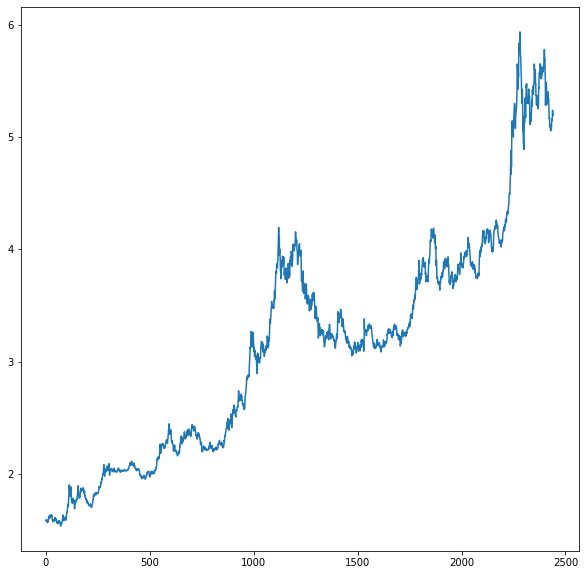

In [82]:
original_dataset = pandas.read_csv('/content/usd2brl.csv', usecols=[1], engine='python')
plt.figure(figsize=(10,10))
plt.plot(original_dataset)
plt.show()

In [69]:
original_dataset

,usd_brl
0,1.5864
1,1.5842
2,1.5776
3,1.5912
4,1.5792
...,...
2437,5.1800
2438,5.2390
2439,5.1942
2440,5.1967


Matriz de valores

In [70]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

Separação dos dados de treinamento e teste

In [84]:
original_dataset = original_dataset.values
original_dataset = original_dataset.astype('float32')
scaler  = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(original_dataset)

train_size  = int(len(dataset) * 0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back      = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY   = create_dataset(test, look_back)

# Regressão com MLP

In [72]:
train_size  = int(len(dataset) * 0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back      = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY   = create_dataset(test, look_back)

Modelo LSTM Vanilla


1 única camada densa foi suficiente para obter bons resultados, com loopback = 10



In [86]:
model1 = Sequential([
    Dense(50, activation='relu'),
    Dense(1)
    ])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)
model1.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['MSE'])
model1.fit(trainX, trainY, epochs=1000, verbose = 0)

In [87]:
# make predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)
# invert predictions
scaled_trainPredict = scaler.inverse_transform(trainPredict)
scaled_trainY = scaler.inverse_transform([trainY])
scaled_testPredict = scaler.inverse_transform(testPredict)
scaled_testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(scaled_trainY[0], scaled_trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(scaled_testY[0], scaled_testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.05 RMSE


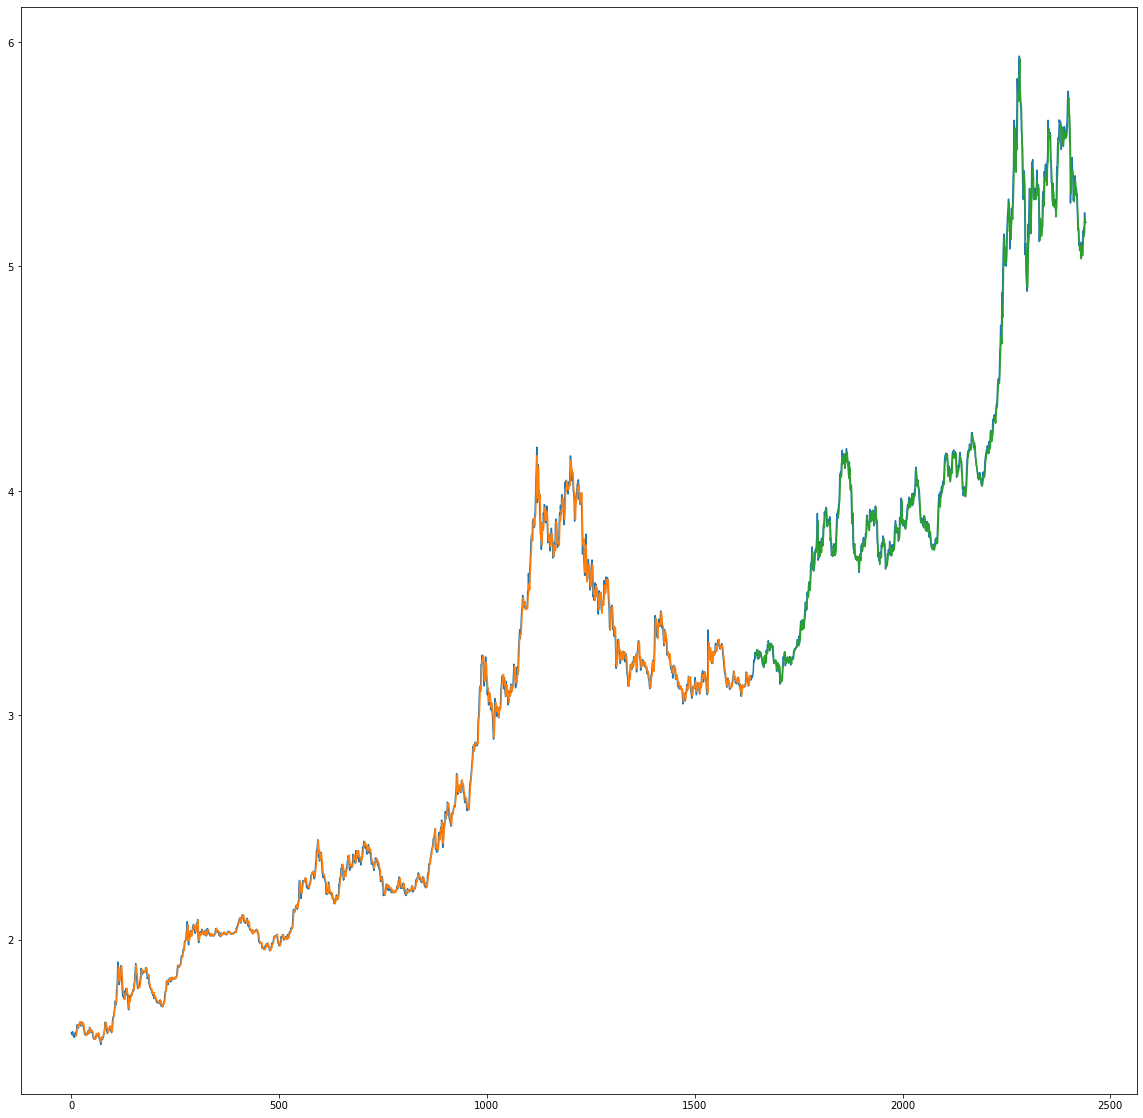

In [88]:
# shift train predictions for plotting
scaled_trainPredictPlot = np.empty_like(dataset)
scaled_trainPredictPlot[:, :] = np.nan
scaled_trainPredictPlot[look_back:len(trainPredict)+look_back, :] = scaled_trainPredict

# shift test predictions for plotting
scaled_testPredictPlot = np.empty_like(dataset)
scaled_testPredictPlot[:, :] = np.nan
scaled_testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = scaled_testPredict

plt.figure(figsize = (20,20))
plt.plot(original_dataset)
plt.plot(scaled_trainPredictPlot)
plt.plot(scaled_testPredictPlot)
plt.show()

#Exercício 6



In [89]:
! shred -u setup_google_colab.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
setup_google_colab.setup_week4()

shred: setup_google_colab.py: failed to open for writing: No such file or directory
--2021-04-13 02:57:01--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3636 (3.6K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   3.55K  --.-KB/s    in 0s      

2021-04-13 02:57:02 (20.1 MB/s) - ‘setup_google_colab.py’ saved [3636/3636]

**************************************************
lfw-deepfunneled.tgz
**************************************************
lfw.tgz
**************************************************
lfw_attributes.txt


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import keras, keras.layers as L, keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split
from lfw_dataset import load_lfw_dataset
%matplotlib inline
import matplotlib.pyplot as plt
import download_utils
import keras_utils
import numpy as np
from keras_utils import reset_tf_session

Using TensorFlow backend.


Utilizado DataSets abaixo:
- http://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt
- http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
- http://vis-www.cs.umass.edu/lfw/lfw.tgz


In [3]:
download_utils.link_week_4_resources()

Carrega imagens e centraliza.
Divide treinos e teste


In [4]:
X, attr = load_lfw_dataset(use_raw=True, dimx=32, dimy=32)
IMG_SHAPE = X.shape[1:]

X = X.astype('float32') / 255.0 - 0.5

X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

**************************************************



In [5]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

X shape: (13143, 32, 32, 3)
attr shape: (13143, 73)


1384

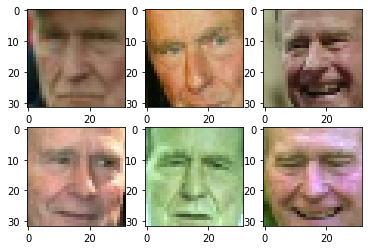

In [6]:
plt.title('sample images')

for i in range(6):
    plt.subplot(2,3,i+1)
    show_image(X[i])

print("X shape:", X.shape)
print("attr shape:", attr.shape)

# free memory
del X
import gc
gc.collect()

Encoder e Decoder sequencial com uma camada densa determinada pela variavel code_size


In [7]:
def build_pca_autoencoder(img_shape, code_size):

    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    encoder.add(L.Flatten())                  #flat imagem para vetor
    encoder.add(L.Dense(code_size))           #encoder

    decoder = keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    decoder.add(L.Dense(np.prod(img_shape)))  #decoder, altura*largura*3
    decoder.add(L.Reshape(img_shape))         #un-flatten
    
    return encoder,decoder

In [8]:
s = reset_tf_session()

encoder, decoder = build_pca_autoencoder(IMG_SHAPE, code_size=32)

inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

autoencoder.fit(x=X_train, y=X_train, epochs=15,
                validation_data=[X_test, X_test],
                verbose=True)




Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 11828 samples, validate on 1315 samples
Epoch 1/15
11828/11828 [==============================] - 3s 232us/step - loss: 0.0125 - val_loss: 0.0085
Epoch 2/15
11828/11828 [==============================] - 1s 85us/step - loss: 0.0077 - val_loss: 0.0071
Epoch 3/15
11828/11828 [==============================] - 1s 86us/step - loss: 0.0069 - val_loss: 0.0067
Epoch 4/15
11828/11828 [==============================] - 1s 85us/step - loss: 0.0068 - val_loss: 0.0067
Epoch 5/15
11828/11828 [==============================] - 1s 84us/step - loss: 0.0067 - val_loss: 0.0067
Epoch 6/15
11828/11828 [==============================] - 1s 84us/step - loss: 0.0067 - val_loss: 0.0067
Epoch 7/15
11828/11828 [==============================] - 1s 86us/step - loss: 0.0067 - val_loss: 0.0066
Epoch 8/15
11828/11828 [==============================] - 1s 85us/step - loss: 0.0067 - val_loss: 0.0066
Epoch 9/15
11828/11828 [=

In [9]:
def visualize(img,encoder,decoder):
    code = encoder.predict(img[None])[0]  
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstruido")
    show_image(reco)
    plt.show()


PCA MSE: 0.006586847675631368


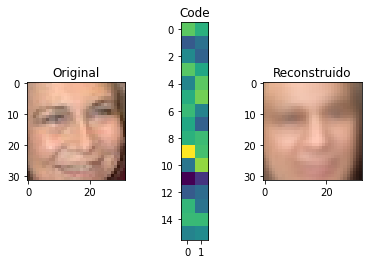

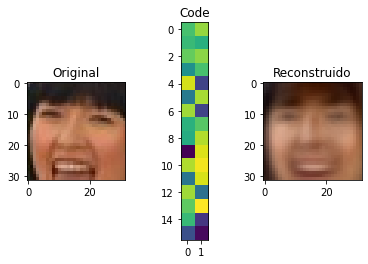

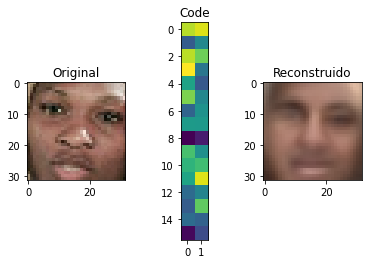

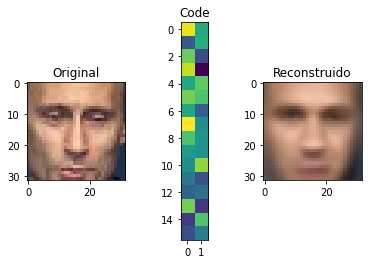

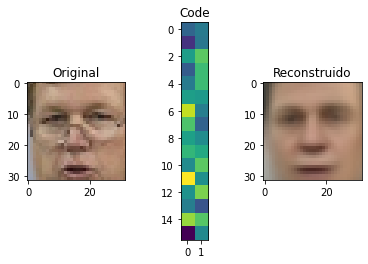

In [10]:
score = autoencoder.evaluate(X_test,X_test,verbose=0)
print("PCA MSE:", score)


for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)